In [101]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

data = pd.read_csv('datajob.csv')
for i, row in data.iterrows():
    if not re.match(r'.*20[0-9]{2}', row.date):
        prev = datetime.strptime(data.iloc[i - 1].date, "%b %d, %Y")
        now = datetime.strptime(data.iloc[i].date[:5] + " " + str(prev.year), "%b %d %Y")
        data.iloc[i] = now.strftime("%b %d, %Y")
    data.iloc[i].year = row.date[-4:]

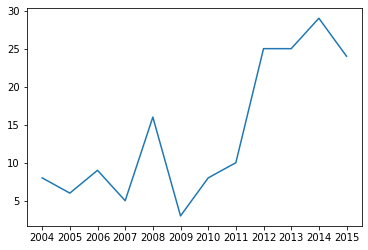

In [102]:
data_count = data[data["Title"].str.contains("Web Developer", na = False)].groupby(['Year']).count()
rdata = {}
for i, r in data_count.iterrows():
    rdata[str(i)] = int(r['IT'])
plt.plot(list(rdata.keys()), list(rdata.values()))